MONAI version: 1.4.0
Numpy version: 1.26.4
Pytorch version: 2.3.1
MONAI flags: HAS_EXT = False, USE_COMPILED = False, USE_META_DICT = False
MONAI rev id: 46a5272196a6c2590ca2589029eed8e4d56ff008
MONAI __file__: c:\Users\<username>\anaconda3\envs\pelvis_seg\lib\site-packages\monai\__init__.py

Optional dependencies:
Pytorch Ignite version: 0.5.1
ITK version: 5.4.2
Nibabel version: 5.3.2
scikit-image version: 0.25.2
scipy version: 1.15.2
Pillow version: 11.1.0
Tensorboard version: 2.19.0
gdown version: NOT INSTALLED or UNKNOWN VERSION.
TorchVision version: 0.18.1
tqdm version: 4.67.1
lmdb version: NOT INSTALLED or UNKNOWN VERSION.
psutil version: 6.1.1
pandas version: 2.2.3
einops version: 0.8.1
transformers version: 4.49.0
mlflow version: NOT INSTALLED or UNKNOWN VERSION.
pynrrd version: 1.1.3
clearml version: NOT INSTALLED or UNKNOWN VERSION.

For details about installing the optional dependencies, please visit:
    https://docs.monai.io/en/latest/installation.html#installing-the-recom

Loading dataset: 100%|██████████| 24/24 [00:23<00:00,  1.03it/s]


训练数据集加载完成!
开始加载验证数据集...


Loading dataset: 100%|██████████| 6/6 [00:06<00:00,  1.00s/it]

验证数据集加载完成!
创建无多进程的训练数据加载器...
创建无多进程的验证数据加载器...
image shape: torch.Size([1, 222, 143, 137]), label shape: torch.Size([1, 222, 143, 137])
Using slice index: 75 for image: 081_0000.nii.gz


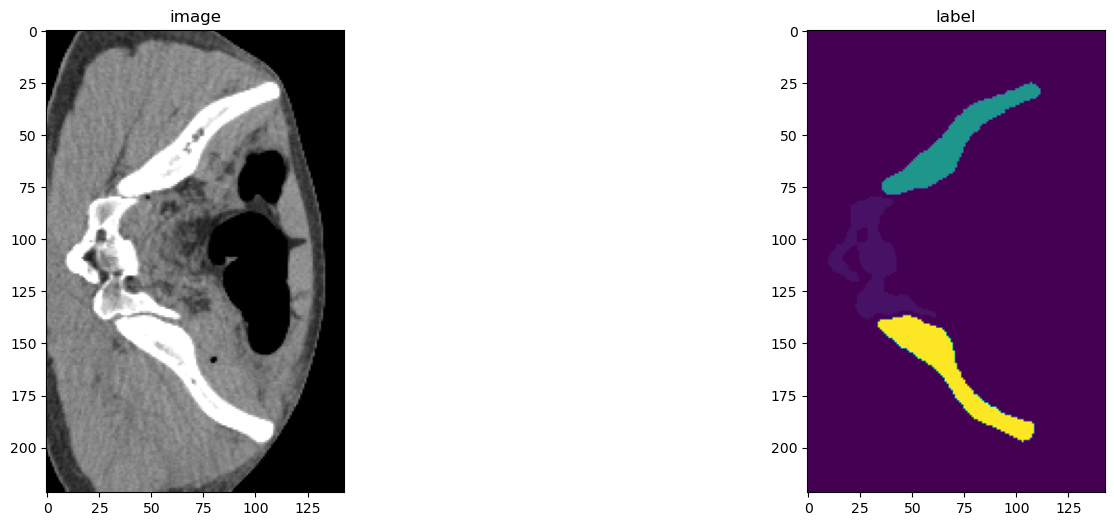



训练设备: cuda
GPU数量: 1
GPU 0: NVIDIA GeForce RTX 4070
当前GPU: 0
CUDA版本: 12.1


训练设备: cuda
GPU数量: 1
GPU 0: NVIDIA GeForce RTX 4070
当前GPU: 0
CUDA版本: 12.1


===== 尝试最小化训练测试 =====
开始最小化训练测试...
执行测试批次前向传播...
计算损失...
损失值: 4.8287
执行反向传播和优化器步骤...
最小化训练测试成功完成!
基础功能测试成功，继续完整训练...

开始训练 - 目标迭代次数: 25000
当前最佳Dice: 0.0000, 在步骤: 0


Epoch 10: 100%|██████████| 80/80 [03:08<00:00,  2.35s/批次, 迭代=800/25000, loss=2.6312, avg_loss=2.6404]


Epoch 10 - 平均损失: 2.6404


Epoch 13:  42%|████▎     | 34/80 [01:28<01:47,  2.34s/批次, 迭代=1000/25000, loss=2.3750, avg_loss=2.2987]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 11, 21]
  sacrum: 交集=0.0, 预测总和=0.0, 真实总和=47129.0
    Dice = 0.0000
  left_hip: 交集=56635.0, 预测总和=193806.0, 真实总和=72371.0
    Dice = 0.4255
  right_hip: 交集=1724.0, 预测总和=4382.0, 真实总和=71320.0
    Dice = 0.0455
  样本平均Dice: 0.1570
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]


Epoch 13:  42%|████▎     | 34/80 [01:31<01:47,  2.34s/批次, 迭代=1000/25000, loss=2.3750, avg_loss=2.2987]

  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 11, 21]
  sacrum: 交集=0.0, 预测总和=0.0, 真实总和=47033.0
    Dice = 0.0000
  left_hip: 交集=54457.0, 预测总和=199684.0, 真实总和=66022.0
    Dice = 0.4099
  right_hip: 交集=1639.0, 预测总和=4592.0, 真实总和=65217.0
    Dice = 0.0470
  样本平均Dice: 0.1523
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 1.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 5, 11, 15, 21, 26]
  sacrum: 交集=0.0, 预测总和=201.0, 真实总和=33409.0
    Dice = 0.0000
  left_hip: 交集=52384.0, 预测总和=256878.0, 真实总和=64107.0
    Dice = 0.3264
  right_hip: 交集=2603.0, 预测总和=17466.0, 真实总和=64881.0
    Dice = 0.0632
  样本平均Dice: 0.1299
样本 3:
  图像形状: torch.Size([1, 1, 290, 252, 134]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 290, 252, 134]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 5, 6, 10, 11, 12, 15, 21, 24, 26]
  sacrum: 交集=0.0, 预测总和=4963.0, 真实总和=

Epoch 20: 100%|██████████| 80/80 [03:07<00:00,  2.34s/批次, 迭代=1600/25000, loss=1.7783, avg_loss=1.7132]


Epoch 20 - 平均损失: 1.7132


Epoch 25:  96%|█████████▋| 77/80 [03:08<00:06,  2.20s/批次, 迭代=2000/25000, loss=1.5146, avg_loss=1.4991]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=2593.0, 预测总和=2846.0, 真实总和=47129.0
    Dice = 0.1038
  left_hip: 交集=5.0, 预测总和=60.0, 真实总和=72371.0
    Dice = 0.0001
  right_hip: 交集=66739.0, 预测总和=186241.0, 真实总和=71320.0
    Dice = 0.5182
  样本平均Dice: 0.2074
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=2187.0, 预测总和=2251.0, 真实总和=47033.0
    Dice = 0.0888
  left_hip: 交集=73.0, 预测总和=225.0, 真实总和=66022.0
    Dice = 0.0022
  right_hip: 交集=61429.0, 预测总和=194338.0, 真实总和=65217.0
    Dice = 0.4733
  样本平均Dice: 0.1881
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 1.0, 11.0, 12.

Epoch 25:  96%|█████████▋| 77/80 [03:16<00:06,  2.20s/批次, 迭代=2000/25000, loss=1.5146, avg_loss=1.4991]

  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=801.0, 预测总和=847.0, 真实总和=33409.0
    Dice = 0.0468
  left_hip: 交集=1.0, 预测总和=7.0, 真实总和=64107.0
    Dice = 0.0000
  right_hip: 交集=60425.0, 预测总和=200378.0, 真实总和=64881.0
    Dice = 0.4556
  样本平均Dice: 0.1675
样本 3:
  图像形状: torch.Size([1, 1, 290, 252, 134]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 290, 252, 134]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=865.0, 预测总和=1000.0, 真实总和=37215.0
    Dice = 0.0453
  left_hip: 交集=4.0, 预测总和=50.0, 真实总和=70053.0
    Dice = 0.0001
  right_hip: 交集=66761.0, 预测总和=233747.0, 真实总和=69143.0
    Dice = 0.4408
  样本平均Dice: 0.1621
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=1657.0, 预测总和=1682.0, 真实总和=41061.0
    Dice = 

Epoch 30: 100%|██████████| 80/80 [03:07<00:00,  2.34s/批次, 迭代=2400/25000, loss=1.3480, avg_loss=1.3579]


Epoch 30 - 平均损失: 1.3579


Epoch 38:  46%|████▋     | 37/80 [01:37<01:41,  2.36s/批次, 迭代=3000/25000, loss=1.1960, avg_loss=1.2301]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=29869.0, 预测总和=37462.0, 真实总和=47129.0
    Dice = 0.7062
  left_hip: 交集=34804.0, 预测总和=43724.0, 真实总和=72371.0
    Dice = 0.5996
  right_hip: 交集=39139.0, 预测总和=57608.0, 真实总和=71320.0
    Dice = 0.6071
  样本平均Dice: 0.6376
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=28502.0, 预测总和=31706.0, 真实总和=47033.0
    Dice = 0.7240
  left_hip: 交集=26356.0, 预测总和=37064.0, 真实总和=66022.0
    Dice = 0.5113
  right_hip: 交集=36004.0, 预测总和=64377.0, 真实总和=65217.0
    Dice = 0.5556
  样本平均Dice: 0.5970
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 38:  46%|████▋     | 37/80 [01:50<01:41,  2.36s/批次, 迭代=3000/25000, loss=1.1960, avg_loss=1.2301]

  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=24868.0, 预测总和=27337.0, 真实总和=41061.0
    Dice = 0.7272
  left_hip: 交集=30400.0, 预测总和=39794.0, 真实总和=62500.0
    Dice = 0.5944
  right_hip: 交集=34381.0, 预测总和=62118.0, 真实总和=60453.0
    Dice = 0.5610
  样本平均Dice: 0.6275
样本 5:
  图像形状: torch.Size([1, 1, 225, 125, 133]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 225, 125, 133]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 225, 125, 133]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=22671.0, 预测总和=26999.0, 真实总和=33531.0
    Dice = 0.7491
  left_hip: 交集=26641.0, 预测总和=38241.0, 真实总和=58603.0
    Dice = 0.5502
  right_hip: 交集=34674.0, 预测总和=59347.0, 真实总和=61548.0
    Dice = 0.5736
  样本平均Dice: 0.6243
样本 6:
  图像形状: torch.Size([1, 1, 246, 151, 125]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 246, 151, 125]), 包含值: [0.0, 1.0, 2.0, 3.0, 11.0, 12.0, 13.0, 14.0, 21.0]
  预测形状: torch.Size([1, 246, 151, 125]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=24206.0, 预测总和=26702.0, 真实总和=4340

Epoch 40: 100%|██████████| 80/80 [03:08<00:00,  2.35s/批次, 迭代=3200/25000, loss=1.1496, avg_loss=1.2169]


Epoch 40 - 平均损失: 1.2169


Epoch 50:  96%|█████████▋| 77/80 [03:08<00:06,  2.26s/批次, 迭代=4000/25000, loss=1.2686, avg_loss=1.1749]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=39826.0, 预测总和=47002.0, 真实总和=47129.0
    Dice = 0.8462
  left_hip: 交集=47098.0, 预测总和=53045.0, 真实总和=72371.0
    Dice = 0.7511
  right_hip: 交集=52591.0, 预测总和=71612.0, 真实总和=71320.0
    Dice = 0.7359
  样本平均Dice: 0.7777
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=41441.0, 预测总和=45524.0, 真实总和=47033.0
    Dice = 0.8955
  left_hip: 交集=40887.0, 预测总和=50411.0, 真实总和=66022.0
    Dice = 0.7023
  right_hip: 交集=46088.0, 预测总和=69837.0, 真实总和=65217.0
    Dice = 0.6825
  样本平均Dice: 0.7601
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 50:  96%|█████████▋| 77/80 [03:20<00:06,  2.26s/批次, 迭代=4000/25000, loss=1.2686, avg_loss=1.1749]

  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=27738.0, 预测总和=41486.0, 真实总和=37215.0
    Dice = 0.7049
  left_hip: 交集=40534.0, 预测总和=55056.0, 真实总和=70053.0
    Dice = 0.6480
  right_hip: 交集=45420.0, 预测总和=72926.0, 真实总和=69143.0
    Dice = 0.6394
  样本平均Dice: 0.6641
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=36990.0, 预测总和=41463.0, 真实总和=41061.0
    Dice = 0.8965
  left_hip: 交集=41479.0, 预测总和=49505.0, 真实总和=62500.0
    Dice = 0.7407
  right_hip: 交集=41827.0, 预测总和=62322.0, 真实总和=60453.0
    Dice = 0.6814
  样本平均Dice: 0.7728
样本 5:
  图像形状: torch.Size([1, 1, 225, 125, 133]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 225, 125, 133]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 225, 125, 133]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=29699.0, 预测总和=35262.0, 真实总和=335

Epoch 50: 100%|██████████| 80/80 [04:57<00:00,  3.72s/批次, 迭代=4000/25000, loss=1.2686, avg_loss=1.1749]


Epoch 50 - 平均损失: 1.1749


Epoch 60: 100%|██████████| 80/80 [03:07<00:00,  2.35s/批次, 迭代=4800/25000, loss=1.1203, avg_loss=1.1346]


Epoch 60 - 平均损失: 1.1346


Epoch 63:  45%|████▌     | 36/80 [01:39<02:03,  2.81s/批次, 迭代=5000/25000, loss=1.0478, avg_loss=1.1228]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=42770.0, 预测总和=47939.0, 真实总和=47129.0
    Dice = 0.8998
  left_hip: 交集=57809.0, 预测总和=60710.0, 真实总和=72371.0
    Dice = 0.8688
  right_hip: 交集=64123.0, 预测总和=78277.0, 真实总和=71320.0
    Dice = 0.8573
  样本平均Dice: 0.8753
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=44113.0, 预测总和=48862.0, 真实总和=47033.0
    Dice = 0.9200
  left_hip: 交集=49121.0, 预测总和=52607.0, 真实总和=66022.0
    Dice = 0.8281
  right_hip: 交集=59044.0, 预测总和=79145.0, 真实总和=65217.0
    Dice = 0.8180
  样本平均Dice: 0.8554
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 63:  45%|████▌     | 36/80 [01:48<02:03,  2.81s/批次, 迭代=5000/25000, loss=1.0478, avg_loss=1.1228]

  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=31408.0, 预测总和=39831.0, 真实总和=37215.0
    Dice = 0.8153
  left_hip: 交集=47861.0, 预测总和=59496.0, 真实总和=70053.0
    Dice = 0.7389
  right_hip: 交集=57536.0, 预测总和=85023.0, 真实总和=69143.0
    Dice = 0.7464
  样本平均Dice: 0.7669
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=38756.0, 预测总和=43596.0, 真实总和=41061.0
    Dice = 0.9156
  left_hip: 交集=49006.0, 预测总和=55650.0, 真实总和=62500.0
    Dice = 0.8296
  right_hip: 交集=52738.0, 预测总和=74222.0, 真实总和=60453.0
    Dice = 0.7832
  样本平均Dice: 0.8428
样本 5:
  图像形状: torch.Size([1, 1, 225, 125, 133]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 225, 125, 133]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 225, 125, 133]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=32100.0, 预测总和=38089.0, 真实总和=335

Glyph 35757 (\N{CJK UNIFIED IDEOGRAPH-8BAD}) missing from font(s) DejaVu Sans.
Glyph 32451 (\N{CJK UNIFIED IDEOGRAPH-7EC3}) missing from font(s) DejaVu Sans.
Glyph 24179 (\N{CJK UNIFIED IDEOGRAPH-5E73}) missing from font(s) DejaVu Sans.
Glyph 22343 (\N{CJK UNIFIED IDEOGRAPH-5747}) missing from font(s) DejaVu Sans.
Glyph 25439 (\N{CJK UNIFIED IDEOGRAPH-635F}) missing from font(s) DejaVu Sans.
Glyph 22833 (\N{CJK UNIFIED IDEOGRAPH-5931}) missing from font(s) DejaVu Sans.
Glyph 36845 (\N{CJK UNIFIED IDEOGRAPH-8FED}) missing from font(s) DejaVu Sans.
Glyph 20195 (\N{CJK UNIFIED IDEOGRAPH-4EE3}) missing from font(s) DejaVu Sans.
Glyph 27425 (\N{CJK UNIFIED IDEOGRAPH-6B21}) missing from font(s) DejaVu Sans.
Glyph 25968 (\N{CJK UNIFIED IDEOGRAPH-6570}) missing from font(s) DejaVu Sans.
Glyph 39564 (\N{CJK UNIFIED IDEOGRAPH-9A8C}) missing from font(s) DejaVu Sans.
Glyph 35777 (\N{CJK UNIFIED IDEOGRAPH-8BC1}) missing from font(s) DejaVu Sans.
Epoch 70: 100%|██████████| 80/80 [03:07<00:00,  2.34

Epoch 70 - 平均损失: 1.0999


Epoch 75:  95%|█████████▌| 76/80 [03:07<00:10,  2.72s/批次, 迭代=6000/25000, loss=1.0529, avg_loss=1.1157]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=33255.0, 预测总和=34237.0, 真实总和=47129.0
    Dice = 0.8174
  left_hip: 交集=63759.0, 预测总和=70745.0, 真实总和=72371.0
    Dice = 0.8910
  right_hip: 交集=64237.0, 预测总和=76757.0, 真实总和=71320.0
    Dice = 0.8676
  样本平均Dice: 0.8587
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=37448.0, 预测总和=38672.0, 真实总和=47033.0
    Dice = 0.8739
  left_hip: 交集=56717.0, 预测总和=68199.0, 真实总和=66022.0
    Dice = 0.8451
  right_hip: 交集=58533.0, 预测总和=73564.0, 真实总和=65217.0
    Dice = 0.8435
  样本平均Dice: 0.8542
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 75:  95%|█████████▌| 76/80 [03:13<00:10,  2.72s/批次, 迭代=6000/25000, loss=1.0529, avg_loss=1.1157]

  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=15447.0, 预测总和=16081.0, 真实总和=33409.0
    Dice = 0.6242
  left_hip: 交集=51462.0, 预测总和=66148.0, 真实总和=64107.0
    Dice = 0.7902
  right_hip: 交集=54908.0, 预测总和=80315.0, 真实总和=64881.0
    Dice = 0.7563
  样本平均Dice: 0.7236
样本 3:
  图像形状: torch.Size([1, 1, 290, 252, 134]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 290, 252, 134]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=18815.0, 预测总和=19336.0, 真实总和=37215.0
    Dice = 0.6654
  left_hip: 交集=57576.0, 预测总和=72605.0, 真实总和=70053.0
    Dice = 0.8072
  right_hip: 交集=58740.0, 预测总和=79042.0, 真实总和=69143.0
    Dice = 0.7928
  样本平均Dice: 0.7551
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=31040.0, 预测总和=31997.0, 真实

Epoch 80: 100%|██████████| 80/80 [03:08<00:00,  2.36s/批次, 迭代=6400/25000, loss=1.1255, avg_loss=1.1002]


Epoch 80 - 平均损失: 1.1002


Epoch 88:  49%|████▉     | 39/80 [01:33<01:39,  2.43s/批次, 迭代=7000/25000, loss=1.0333, avg_loss=1.0898]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=40411.0, 预测总和=41534.0, 真实总和=47129.0
    Dice = 0.9116
  left_hip: 交集=63411.0, 预测总和=68324.0, 真实总和=72371.0
    Dice = 0.9014
  right_hip: 交集=67086.0, 预测总和=78291.0, 真实总和=71320.0
    Dice = 0.8968
  样本平均Dice: 0.9033
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=40761.0, 预测总和=42117.0, 真实总和=47033.0
    Dice = 0.9144
  left_hip: 交集=55686.0, 预测总和=60409.0, 真实总和=66022.0
    Dice = 0.8809
  right_hip: 交集=61841.0, 预测总和=76832.0, 真实总和=65217.0
    Dice = 0.8707
  样本平均Dice: 0.8887
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 88:  49%|████▉     | 39/80 [01:48<01:39,  2.43s/批次, 迭代=7000/25000, loss=1.0333, avg_loss=1.0898]

  预测形状: torch.Size([1, 225, 125, 133]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=29189.0, 预测总和=31943.0, 真实总和=33531.0
    Dice = 0.8916
  left_hip: 交集=49826.0, 预测总和=51966.0, 真实总和=58603.0
    Dice = 0.9013
  right_hip: 交集=57988.0, 预测总和=68447.0, 真实总和=61548.0
    Dice = 0.8922
  样本平均Dice: 0.8950
样本 6:
  图像形状: torch.Size([1, 1, 246, 151, 125]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 246, 151, 125]), 包含值: [0.0, 1.0, 2.0, 3.0, 11.0, 12.0, 13.0, 14.0, 21.0]
  预测形状: torch.Size([1, 246, 151, 125]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=32588.0, 预测总和=34600.0, 真实总和=43405.0
    Dice = 0.8355
  left_hip: 交集=59178.0, 预测总和=65613.0, 真实总和=75337.0
    Dice = 0.8397
  right_hip: 交集=63085.0, 预测总和=74521.0, 真实总和=78112.0
    Dice = 0.8266
  样本平均Dice: 0.8340
样本 7:
  图像形状: torch.Size([1, 1, 297, 149, 163]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 297, 149, 163]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 297, 149, 163]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=39587.0, 预测总和=41808.0, 真实总和=46800.0
    Dice = 0.

Epoch 90: 100%|██████████| 80/80 [03:07<00:00,  2.35s/批次, 迭代=7200/25000, loss=1.0556, avg_loss=1.0809]


Epoch 90 - 平均损失: 1.0809


Epoch 100:  96%|█████████▋| 77/80 [03:08<00:06,  2.06s/批次, 迭代=8000/25000, loss=1.0383, avg_loss=1.0681]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=42264.0, 预测总和=43828.0, 真实总和=47129.0
    Dice = 0.9293
  left_hip: 交集=65746.0, 预测总和=68613.0, 真实总和=72371.0
    Dice = 0.9327
  right_hip: 交集=68687.0, 预测总和=76038.0, 真实总和=71320.0
    Dice = 0.9322
  样本平均Dice: 0.9314
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=42954.0, 预测总和=44617.0, 真实总和=47033.0
    Dice = 0.9373
  left_hip: 交集=59381.0, 预测总和=61173.0, 真实总和=66022.0
    Dice = 0.9337
  right_hip: 交集=63318.0, 预测总和=69972.0, 真实总和=65217.0
    Dice = 0.9367
  样本平均Dice: 0.9359
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 100:  96%|█████████▋| 77/80 [03:15<00:06,  2.06s/批次, 迭代=8000/25000, loss=1.0383, avg_loss=1.0681]

  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=29807.0, 预测总和=31555.0, 真实总和=33409.0
    Dice = 0.9176
  left_hip: 交集=54879.0, 预测总和=56866.0, 真实总和=64107.0
    Dice = 0.9073
  right_hip: 交集=61817.0, 预测总和=77456.0, 真实总和=64881.0
    Dice = 0.8686
  样本平均Dice: 0.8978
样本 3:
  图像形状: torch.Size([1, 1, 290, 252, 134]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 290, 252, 134]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=28567.0, 预测总和=30817.0, 真实总和=37215.0
    Dice = 0.8398
  left_hip: 交集=62024.0, 预测总和=67975.0, 真实总和=70053.0
    Dice = 0.8987
  right_hip: 交集=66262.0, 预测总和=77390.0, 真实总和=69143.0
    Dice = 0.9044
  样本平均Dice: 0.8810
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=38536.0, 预测总和=40051.0, 真实

Epoch 100: 100%|██████████| 80/80 [04:57<00:00,  3.72s/批次, 迭代=8000/25000, loss=1.0383, avg_loss=1.0681]


Epoch 100 - 平均损失: 1.0681


Epoch 110: 100%|██████████| 80/80 [03:08<00:00,  2.36s/批次, 迭代=8800/25000, loss=1.0428, avg_loss=1.0589]


Epoch 110 - 平均损失: 1.0589


Epoch 113:  42%|████▎     | 34/80 [01:34<01:55,  2.50s/批次, 迭代=9000/25000, loss=1.0790, avg_loss=1.0528]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=40409.0, 预测总和=41419.0, 真实总和=47129.0
    Dice = 0.9127
  left_hip: 交集=67074.0, 预测总和=70850.0, 真实总和=72371.0
    Dice = 0.9367
  right_hip: 交集=68605.0, 预测总和=73964.0, 真实总和=71320.0
    Dice = 0.9444
  样本平均Dice: 0.9313
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=41937.0, 预测总和=43156.0, 真实总和=47033.0
    Dice = 0.9300
  left_hip: 交集=63326.0, 预测总和=66188.0, 真实总和=66022.0
    Dice = 0.9580
  right_hip: 交集=63073.0, 预测总和=66426.0, 真实总和=65217.0
    Dice = 0.9582
  样本平均Dice: 0.9487
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 113:  42%|████▎     | 34/80 [01:40<01:55,  2.50s/批次, 迭代=9000/25000, loss=1.0790, avg_loss=1.0528]

  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=25714.0, 预测总和=26669.0, 真实总和=33409.0
    Dice = 0.8560
  left_hip: 交集=59481.0, 预测总和=62359.0, 真实总和=64107.0
    Dice = 0.9407
  right_hip: 交集=61530.0, 预测总和=70583.0, 真实总和=64881.0
    Dice = 0.9084
  样本平均Dice: 0.9017
样本 3:
  图像形状: torch.Size([1, 1, 290, 252, 134]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 290, 252, 134]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=25733.0, 预测总和=27079.0, 真实总和=37215.0
    Dice = 0.8005
  left_hip: 交集=65668.0, 预测总和=72983.0, 真实总和=70053.0
    Dice = 0.9182
  right_hip: 交集=66062.0, 预测总和=73020.0, 真实总和=69143.0
    Dice = 0.9294
  样本平均Dice: 0.8827
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=37202.0, 预测总和=38065.0, 真实

Epoch 120: 100%|██████████| 80/80 [03:08<00:00,  2.35s/批次, 迭代=9600/25000, loss=0.9928, avg_loss=1.0457]


Epoch 120 - 平均损失: 1.0457


Epoch 125:  98%|█████████▊| 78/80 [03:07<00:05,  2.53s/批次, 迭代=10000/25000, loss=1.0649, avg_loss=1.0417]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=39968.0, 预测总和=41115.0, 真实总和=47129.0
    Dice = 0.9059
  left_hip: 交集=67060.0, 预测总和=71616.0, 真实总和=72371.0
    Dice = 0.9315
  right_hip: 交集=66091.0, 预测总和=70882.0, 真实总和=71320.0
    Dice = 0.9295
  样本平均Dice: 0.9223
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]


Epoch 125:  98%|█████████▊| 78/80 [03:11<00:05,  2.53s/批次, 迭代=10000/25000, loss=1.0649, avg_loss=1.0417]

  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=42731.0, 预测总和=44202.0, 真实总和=47033.0
    Dice = 0.9367
  left_hip: 交集=63282.0, 预测总和=66943.0, 真实总和=66022.0
    Dice = 0.9519
  right_hip: 交集=63129.0, 预测总和=66634.0, 真实总和=65217.0
    Dice = 0.9576
  样本平均Dice: 0.9487
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 1.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=26376.0, 预测总和=27568.0, 真实总和=33409.0
    Dice = 0.8651
  left_hip: 交集=59843.0, 预测总和=63549.0, 真实总和=64107.0
    Dice = 0.9376
  right_hip: 交集=59979.0, 预测总和=65956.0, 真实总和=64881.0
    Dice = 0.9169
  样本平均Dice: 0.9065
样本 3:
  图像形状: torch.Size([1, 1, 290, 252, 134]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 290, 252, 134]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=26612.0, 预测总和=27997.0, 真实总和=37215.0


Epoch 130: 100%|██████████| 80/80 [03:07<00:00,  2.34s/批次, 迭代=10400/25000, loss=1.0143, avg_loss=1.0511]


Epoch 130 - 平均损失: 1.0511


Epoch 138:  48%|████▊     | 38/80 [01:31<01:35,  2.28s/批次, 迭代=11000/25000, loss=1.0611, avg_loss=1.0433]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=41079.0, 预测总和=42666.0, 真实总和=47129.0
    Dice = 0.9150
  left_hip: 交集=70853.0, 预测总和=75269.0, 真实总和=72371.0
    Dice = 0.9598
  right_hip: 交集=68609.0, 预测总和=73238.0, 真实总和=71320.0
    Dice = 0.9492
  样本平均Dice: 0.9413
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=43177.0, 预测总和=45192.0, 真实总和=47033.0
    Dice = 0.9363
  left_hip: 交集=64832.0, 预测总和=68063.0, 真实总和=66022.0
    Dice = 0.9670
  right_hip: 交集=63889.0, 预测总和=66994.0, 真实总和=65217.0
    Dice = 0.9665
  样本平均Dice: 0.9566
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 138:  48%|████▊     | 38/80 [01:41<01:35,  2.28s/批次, 迭代=11000/25000, loss=1.0611, avg_loss=1.0433]

  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=28578.0, 预测总和=30759.0, 真实总和=37215.0
    Dice = 0.8409
  left_hip: 交集=67799.0, 预测总和=75724.0, 真实总和=70053.0
    Dice = 0.9302
  right_hip: 交集=66335.0, 预测总和=70399.0, 真实总和=69143.0
    Dice = 0.9508
  样本平均Dice: 0.9073
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=38869.0, 预测总和=40340.0, 真实总和=41061.0
    Dice = 0.9550
  left_hip: 交集=60893.0, 预测总和=69004.0, 真实总和=62500.0
    Dice = 0.9261
  right_hip: 交集=57764.0, 预测总和=61054.0, 真实总和=60453.0
    Dice = 0.9508
  样本平均Dice: 0.9440
样本 5:
  图像形状: torch.Size([1, 1, 225, 125, 133]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 225, 125, 133]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 225, 125, 133]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=29950.0, 预测总和=32763.0, 真实总和=335

Epoch 140: 100%|██████████| 80/80 [03:07<00:00,  2.35s/批次, 迭代=11200/25000, loss=0.9855, avg_loss=1.0446]


Epoch 140 - 平均损失: 1.0446


Epoch 150:  94%|█████████▍| 75/80 [03:08<00:12,  2.57s/批次, 迭代=12000/25000, loss=1.0502, avg_loss=1.0385]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=43706.0, 预测总和=45543.0, 真实总和=47129.0
    Dice = 0.9432
  left_hip: 交集=70171.0, 预测总和=75308.0, 真实总和=72371.0
    Dice = 0.9503
  right_hip: 交集=69499.0, 预测总和=74107.0, 真实总和=71320.0
    Dice = 0.9558
  样本平均Dice: 0.9498
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=44800.0, 预测总和=46792.0, 真实总和=47033.0
    Dice = 0.9550
  left_hip: 交集=64154.0, 预测总和=66485.0, 真实总和=66022.0
    Dice = 0.9683
  right_hip: 交集=63212.0, 预测总和=65644.0, 真实总和=65217.0
    Dice = 0.9661
  样本平均Dice: 0.9631
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 150:  94%|█████████▍| 75/80 [03:16<00:12,  2.57s/批次, 迭代=12000/25000, loss=1.0502, avg_loss=1.0385]

  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=30134.0, 预测总和=31552.0, 真实总和=33409.0
    Dice = 0.9278
  left_hip: 交集=60680.0, 预测总和=64019.0, 真实总和=64107.0
    Dice = 0.9472
  right_hip: 交集=62213.0, 预测总和=65893.0, 真实总和=64881.0
    Dice = 0.9515
  样本平均Dice: 0.9421
样本 3:
  图像形状: torch.Size([1, 1, 290, 252, 134]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 290, 252, 134]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=29656.0, 预测总和=32880.0, 真实总和=37215.0
    Dice = 0.8462
  left_hip: 交集=66866.0, 预测总和=71798.0, 真实总和=70053.0
    Dice = 0.9428
  right_hip: 交集=66488.0, 预测总和=68799.0, 真实总和=69143.0
    Dice = 0.9640
  样本平均Dice: 0.9176
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=39290.0, 预测总和=41114.0, 真实

Epoch 150: 100%|██████████| 80/80 [04:57<00:00,  3.72s/批次, 迭代=12000/25000, loss=1.0502, avg_loss=1.0385]


Epoch 150 - 平均损失: 1.0385


Epoch 160: 100%|██████████| 80/80 [03:07<00:00,  2.34s/批次, 迭代=12800/25000, loss=0.9978, avg_loss=1.0316]


Epoch 160 - 平均损失: 1.0316


Epoch 163:  49%|████▉     | 39/80 [01:40<01:47,  2.61s/批次, 迭代=13000/25000, loss=0.9810, avg_loss=1.0306]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=41465.0, 预测总和=42433.0, 真实总和=47129.0
    Dice = 0.9260
  left_hip: 交集=71285.0, 预测总和=76355.0, 真实总和=72371.0
    Dice = 0.9586
  right_hip: 交集=68264.0, 预测总和=72282.0, 真实总和=71320.0
    Dice = 0.9507
  样本平均Dice: 0.9451
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=42459.0, 预测总和=43870.0, 真实总和=47033.0
    Dice = 0.9342
  left_hip: 交集=65061.0, 预测总和=68848.0, 真实总和=66022.0
    Dice = 0.9648
  right_hip: 交集=63633.0, 预测总和=66325.0, 真实总和=65217.0
    Dice = 0.9675
  样本平均Dice: 0.9555
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 163:  49%|████▉     | 39/80 [01:52<01:47,  2.61s/批次, 迭代=13000/25000, loss=0.9810, avg_loss=1.0306]

  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=25867.0, 预测总和=27689.0, 真实总和=37215.0
    Dice = 0.7971
  left_hip: 交集=68152.0, 预测总和=73786.0, 真实总和=70053.0
    Dice = 0.9476
  right_hip: 交集=66353.0, 预测总和=68367.0, 真实总和=69143.0
    Dice = 0.9651
  样本平均Dice: 0.9033
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=37566.0, 预测总和=38457.0, 真实总和=41061.0
    Dice = 0.9448
  left_hip: 交集=61152.0, 预测总和=66804.0, 真实总和=62500.0
    Dice = 0.9459
  right_hip: 交集=58162.0, 预测总和=60757.0, 真实总和=60453.0
    Dice = 0.9597
  样本平均Dice: 0.9501
样本 5:
  图像形状: torch.Size([1, 1, 225, 125, 133]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 225, 125, 133]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 225, 125, 133]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=29536.0, 预测总和=31701.0, 真实总和=335

Epoch 170: 100%|██████████| 80/80 [03:08<00:00,  2.35s/批次, 迭代=13600/25000, loss=1.0117, avg_loss=1.0336]


Epoch 170 - 平均损失: 1.0336


Epoch 175:  95%|█████████▌| 76/80 [03:08<00:09,  2.41s/批次, 迭代=14000/25000, loss=1.0014, avg_loss=1.0269]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=44636.0, 预测总和=46758.0, 真实总和=47129.0
    Dice = 0.9508
  left_hip: 交集=70656.0, 预测总和=74351.0, 真实总和=72371.0
    Dice = 0.9631
  right_hip: 交集=68603.0, 预测总和=72820.0, 真实总和=71320.0
    Dice = 0.9519
  样本平均Dice: 0.9553
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=45168.0, 预测总和=47816.0, 真实总和=47033.0
    Dice = 0.9524
  left_hip: 交集=64012.0, 预测总和=65936.0, 真实总和=66022.0
    Dice = 0.9702
  right_hip: 交集=63577.0, 预测总和=66599.0, 真实总和=65217.0
    Dice = 0.9646
  样本平均Dice: 0.9624
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 175:  95%|█████████▌| 76/80 [03:17<00:09,  2.41s/批次, 迭代=14000/25000, loss=1.0014, avg_loss=1.0269]

  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=30616.0, 预测总和=33003.0, 真实总和=33409.0
    Dice = 0.9220
  left_hip: 交集=60645.0, 预测总和=62822.0, 真实总和=64107.0
    Dice = 0.9556
  right_hip: 交集=62383.0, 预测总和=65509.0, 真实总和=64881.0
    Dice = 0.9569
  样本平均Dice: 0.9448
样本 3:
  图像形状: torch.Size([1, 1, 290, 252, 134]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 290, 252, 134]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=33149.0, 预测总和=36452.0, 真实总和=37215.0
    Dice = 0.9000
  left_hip: 交集=65740.0, 预测总和=68685.0, 真实总和=70053.0
    Dice = 0.9477
  right_hip: 交集=66858.0, 预测总和=70121.0, 真实总和=69143.0
    Dice = 0.9602
  样本平均Dice: 0.9359
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=39751.0, 预测总和=42047.0, 真实

Epoch 180: 100%|██████████| 80/80 [03:08<00:00,  2.36s/批次, 迭代=14400/25000, loss=1.1148, avg_loss=1.0415]


Epoch 180 - 平均损失: 1.0415


Epoch 188:  46%|████▋     | 37/80 [01:20<01:20,  1.87s/批次, 迭代=15000/25000, loss=1.1449, avg_loss=1.0128]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=43596.0, 预测总和=44954.0, 真实总和=47129.0
    Dice = 0.9469
  left_hip: 交集=71413.0, 预测总和=76896.0, 真实总和=72371.0
    Dice = 0.9568
  right_hip: 交集=69578.0, 预测总和=74392.0, 真实总和=71320.0
    Dice = 0.9550
  样本平均Dice: 0.9529
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=44517.0, 预测总和=46378.0, 真实总和=47033.0
    Dice = 0.9531
  left_hip: 交集=64805.0, 预测总和=67808.0, 真实总和=66022.0
    Dice = 0.9685
  right_hip: 交集=63977.0, 预测总和=67391.0, 真实总和=65217.0
    Dice = 0.9649
  样本平均Dice: 0.9622
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 188:  46%|████▋     | 37/80 [01:31<01:20,  1.87s/批次, 迭代=15000/25000, loss=1.1449, avg_loss=1.0128]

  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=32248.0, 预测总和=35581.0, 真实总和=37215.0
    Dice = 0.8860
  left_hip: 交集=67699.0, 预测总和=71437.0, 真实总和=70053.0
    Dice = 0.9569
  right_hip: 交集=67278.0, 预测总和=69895.0, 真实总和=69143.0
    Dice = 0.9678
  样本平均Dice: 0.9369
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=39208.0, 预测总和=40771.0, 真实总和=41061.0
    Dice = 0.9583
  left_hip: 交集=60774.0, 预测总和=65790.0, 真实总和=62500.0
    Dice = 0.9474
  right_hip: 交集=58918.0, 预测总和=62287.0, 真实总和=60453.0
    Dice = 0.9600
  样本平均Dice: 0.9552
样本 5:
  图像形状: torch.Size([1, 1, 225, 125, 133]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 225, 125, 133]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 225, 125, 133]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=31798.0, 预测总和=34674.0, 真实总和=335

Epoch 190: 100%|██████████| 80/80 [03:08<00:00,  2.36s/批次, 迭代=15200/25000, loss=1.2371, avg_loss=1.0252]


Epoch 190 - 平均损失: 1.0252


Epoch 200:  99%|█████████▉| 79/80 [03:08<00:02,  2.31s/批次, 迭代=16000/25000, loss=0.9847, avg_loss=1.0340]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=40186.0, 预测总和=41000.0, 真实总和=47129.0
    Dice = 0.9120
  left_hip: 交集=69007.0, 预测总和=73391.0, 真实总和=72371.0
    Dice = 0.9468
  right_hip: 交集=70014.0, 预测总和=76665.0, 真实总和=71320.0
    Dice = 0.9462
  样本平均Dice: 0.9350
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=42606.0, 预测总和=43815.0, 真实总和=47033.0
    Dice = 0.9380
  left_hip: 交集=62487.0, 预测总和=65398.0, 真实总和=66022.0
    Dice = 0.9510
  right_hip: 交集=64393.0, 预测总和=69493.0, 真实总和=65217.0
    Dice = 0.9560
  样本平均Dice: 0.9483
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 200:  99%|█████████▉| 79/80 [03:23<00:02,  2.31s/批次, 迭代=16000/25000, loss=0.9847, avg_loss=1.0340]

  预测形状: torch.Size([1, 225, 125, 133]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=27874.0, 预测总和=28802.0, 真实总和=33531.0
    Dice = 0.8944
  left_hip: 交集=55482.0, 预测总和=57589.0, 真实总和=58603.0
    Dice = 0.9550
  right_hip: 交集=60680.0, 预测总和=66270.0, 真实总和=61548.0
    Dice = 0.9495
  样本平均Dice: 0.9329
样本 6:
  图像形状: torch.Size([1, 1, 246, 151, 125]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 246, 151, 125]), 包含值: [0.0, 1.0, 2.0, 3.0, 11.0, 12.0, 13.0, 14.0, 21.0]
  预测形状: torch.Size([1, 246, 151, 125]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=34660.0, 预测总和=36000.0, 真实总和=43405.0
    Dice = 0.8730
  left_hip: 交集=68458.0, 预测总和=70176.0, 真实总和=75337.0
    Dice = 0.9409
  right_hip: 交集=74177.0, 预测总和=80103.0, 真实总和=78112.0
    Dice = 0.9377
  样本平均Dice: 0.9172
样本 7:
  图像形状: torch.Size([1, 1, 297, 149, 163]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 297, 149, 163]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 297, 149, 163]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=40832.0, 预测总和=41755.0, 真实总和=46800.0
    Dice = 0.

Epoch 200: 100%|██████████| 80/80 [04:57<00:00,  3.72s/批次, 迭代=16000/25000, loss=0.9847, avg_loss=1.0340]


Epoch 200 - 平均损失: 1.0340


Epoch 210: 100%|██████████| 80/80 [03:08<00:00,  2.36s/批次, 迭代=16800/25000, loss=1.0328, avg_loss=1.0154]


Epoch 210 - 平均损失: 1.0154


Epoch 213:  45%|████▌     | 36/80 [01:31<01:45,  2.40s/批次, 迭代=17000/25000, loss=0.9948, avg_loss=1.0246]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=44150.0, 预测总和=45790.0, 真实总和=47129.0
    Dice = 0.9503
  left_hip: 交集=70225.0, 预测总和=74214.0, 真实总和=72371.0
    Dice = 0.9581
  right_hip: 交集=70001.0, 预测总和=75362.0, 真实总和=71320.0
    Dice = 0.9545
  样本平均Dice: 0.9543
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=44541.0, 预测总和=46821.0, 真实总和=47033.0
    Dice = 0.9492
  left_hip: 交集=63131.0, 预测总和=65341.0, 真实总和=66022.0
    Dice = 0.9612
  right_hip: 交集=63461.0, 预测总和=67051.0, 真实总和=65217.0
    Dice = 0.9596
  样本平均Dice: 0.9566
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 213:  45%|████▌     | 36/80 [01:39<01:45,  2.40s/批次, 迭代=17000/25000, loss=0.9948, avg_loss=1.0246]

  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=30960.0, 预测总和=32819.0, 真实总和=33409.0
    Dice = 0.9350
  left_hip: 交集=60429.0, 预测总和=63142.0, 真实总和=64107.0
    Dice = 0.9498
  right_hip: 交集=62722.0, 预测总和=66541.0, 真实总和=64881.0
    Dice = 0.9545
  样本平均Dice: 0.9464
样本 3:
  图像形状: torch.Size([1, 1, 290, 252, 134]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 290, 252, 134]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=31713.0, 预测总和=34618.0, 真实总和=37215.0
    Dice = 0.8830
  left_hip: 交集=66301.0, 预测总和=68924.0, 真实总和=70053.0
    Dice = 0.9541
  right_hip: 交集=67149.0, 预测总和=70488.0, 真实总和=69143.0
    Dice = 0.9618
  样本平均Dice: 0.9330
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=39261.0, 预测总和=41030.0, 真实

Epoch 220: 100%|██████████| 80/80 [03:07<00:00,  2.34s/批次, 迭代=17600/25000, loss=1.0346, avg_loss=1.0184]


Epoch 220 - 平均损失: 1.0184


Epoch 225:  98%|█████████▊| 78/80 [03:06<00:04,  2.32s/批次, 迭代=18000/25000, loss=0.9927, avg_loss=1.0157]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=44083.0, 预测总和=45653.0, 真实总和=47129.0
    Dice = 0.9502
  left_hip: 交集=70918.0, 预测总和=77718.0, 真实总和=72371.0
    Dice = 0.9450
  right_hip: 交集=70532.0, 预测总和=76676.0, 真实总和=71320.0
    Dice = 0.9532
  样本平均Dice: 0.9495
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=44812.0, 预测总和=46482.0, 真实总和=47033.0
    Dice = 0.9584
  left_hip: 交集=64305.0, 预测总和=68008.0, 真实总和=66022.0
    Dice = 0.9596
  right_hip: 交集=64398.0, 预测总和=68608.0, 真实总和=65217.0
    Dice = 0.9624
  样本平均Dice: 0.9601
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 225:  98%|█████████▊| 78/80 [03:25<00:04,  2.32s/批次, 迭代=18000/25000, loss=0.9927, avg_loss=1.0157]

  预测形状: torch.Size([1, 246, 151, 125]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=37754.0, 预测总和=39652.0, 真实总和=43405.0
    Dice = 0.9091
  left_hip: 交集=71403.0, 预测总和=74016.0, 真实总和=75337.0
    Dice = 0.9562
  right_hip: 交集=74816.0, 预测总和=77716.0, 真实总和=78112.0
    Dice = 0.9602
  样本平均Dice: 0.9418
样本 7:
  图像形状: torch.Size([1, 1, 297, 149, 163]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 297, 149, 163]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 297, 149, 163]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=44521.0, 预测总和=47727.0, 真实总和=46800.0
    Dice = 0.9420
  left_hip: 交集=79370.0, 预测总和=84314.0, 真实总和=83166.0
    Dice = 0.9478
  right_hip: 交集=80308.0, 预测总和=88313.0, 真实总和=81737.0
    Dice = 0.9445
  样本平均Dice: 0.9448
样本 8:
  图像形状: torch.Size([1, 1, 265, 265, 146]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 265, 265, 146]), 包含值: [0.0, 1.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 265, 265, 146]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=47401.0, 预测总和=49528.0, 真实总和=50157.0
    Dice = 0.9510
  lef

Epoch 230: 100%|██████████| 80/80 [03:36<00:00,  2.70s/批次, 迭代=18400/25000, loss=0.9885, avg_loss=1.0123]


Epoch 230 - 平均损失: 1.0123


Epoch 238:  48%|████▊     | 38/80 [01:51<02:07,  3.02s/批次, 迭代=19000/25000, loss=1.0481, avg_loss=1.0187]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=43130.0, 预测总和=44158.0, 真实总和=47129.0
    Dice = 0.9449
  left_hip: 交集=70308.0, 预测总和=73524.0, 真实总和=72371.0
    Dice = 0.9638
  right_hip: 交集=66352.0, 预测总和=68815.0, 真实总和=71320.0
    Dice = 0.9470
  样本平均Dice: 0.9519
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=43816.0, 预测总和=45222.0, 真实总和=47033.0
    Dice = 0.9499
  left_hip: 交集=64317.0, 预测总和=66475.0, 真实总和=66022.0
    Dice = 0.9708
  right_hip: 交集=61735.0, 预测总和=62766.0, 真实总和=65217.0
    Dice = 0.9647
  样本平均Dice: 0.9618
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 238:  48%|████▊     | 38/80 [02:00<02:07,  3.02s/批次, 迭代=19000/25000, loss=1.0481, avg_loss=1.0187]

  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=29480.0, 预测总和=31444.0, 真实总和=37215.0
    Dice = 0.8587
  left_hip: 交集=67095.0, 预测总和=69441.0, 真实总和=70053.0
    Dice = 0.9620
  right_hip: 交集=64350.0, 预测总和=65336.0, 真实总和=69143.0
    Dice = 0.9570
  样本平均Dice: 0.9259
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=38391.0, 预测总和=39473.0, 真实总和=41061.0
    Dice = 0.9534
  left_hip: 交集=60390.0, 预测总和=64224.0, 真实总和=62500.0
    Dice = 0.9531
  right_hip: 交集=56525.0, 预测总和=57978.0, 真实总和=60453.0
    Dice = 0.9546
  样本平均Dice: 0.9537
样本 5:
  图像形状: torch.Size([1, 1, 225, 125, 133]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 225, 125, 133]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 225, 125, 133]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=30320.0, 预测总和=32340.0, 真实总和=335

Epoch 240: 100%|██████████| 80/80 [03:35<00:00,  2.69s/批次, 迭代=19200/25000, loss=0.9909, avg_loss=1.0181]


Epoch 240 - 平均损失: 1.0181


Epoch 250:  95%|█████████▌| 76/80 [03:11<00:12,  3.09s/批次, 迭代=20000/25000, loss=0.9779, avg_loss=1.0059]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]


Epoch 250:  95%|█████████▌| 76/80 [03:13<00:12,  3.09s/批次, 迭代=20000/25000, loss=0.9779, avg_loss=1.0059]

  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 12, 21]
  sacrum: 交集=44732.0, 预测总和=46322.0, 真实总和=47129.0
    Dice = 0.9573
  left_hip: 交集=71549.0, 预测总和=75335.0, 真实总和=72371.0
    Dice = 0.9688
  right_hip: 交集=69205.0, 预测总和=72766.0, 真实总和=71320.0
    Dice = 0.9606
  样本平均Dice: 0.9622
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=45312.0, 预测总和=47051.0, 真实总和=47033.0
    Dice = 0.9632
  left_hip: 交集=64843.0, 预测总和=67076.0, 真实总和=66022.0
    Dice = 0.9744
  right_hip: 交集=63896.0, 预测总和=66054.0, 真实总和=65217.0
    Dice = 0.9735
  样本平均Dice: 0.9704
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 1.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 1, 11, 12, 21]
  sacrum: 交集=31643.0, 预测总和=35202.0, 真实总和=33409.0
    Dice = 0.92

Epoch 250: 100%|██████████| 80/80 [05:03<00:00,  3.79s/批次, 迭代=20000/25000, loss=0.9779, avg_loss=1.0059]


Epoch 250 - 平均损失: 1.0059


Epoch 260: 100%|██████████| 80/80 [03:10<00:00,  2.38s/批次, 迭代=20800/25000, loss=1.0388, avg_loss=1.0197]


Epoch 260 - 平均损失: 1.0197


Epoch 263:  45%|████▌     | 36/80 [01:34<01:36,  2.19s/批次, 迭代=21000/25000, loss=0.9771, avg_loss=1.0154]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 12, 21]
  sacrum: 交集=44961.0, 预测总和=47218.0, 真实总和=47129.0
    Dice = 0.9531
  left_hip: 交集=71874.0, 预测总和=78688.0, 真实总和=72371.0
    Dice = 0.9516
  right_hip: 交集=67331.0, 预测总和=70631.0, 真实总和=71320.0
    Dice = 0.9487
  样本平均Dice: 0.9511
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 12, 21, 22]
  sacrum: 交集=45498.0, 预测总和=48256.0, 真实总和=47033.0
    Dice = 0.9549
  left_hip: 交集=65249.0, 预测总和=70141.0, 真实总和=66022.0
    Dice = 0.9584
  right_hip: 交集=61083.0, 预测总和=62631.0, 真实总和=65217.0
    Dice = 0.9556
  样本平均Dice: 0.9563
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]),

Epoch 263:  45%|████▌     | 36/80 [01:40<01:36,  2.19s/批次, 迭代=21000/25000, loss=0.9771, avg_loss=1.0154]

  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 1, 11, 12, 21, 22]
  sacrum: 交集=31642.0, 预测总和=34573.0, 真实总和=33409.0
    Dice = 0.9309
  left_hip: 交集=62913.0, 预测总和=68657.0, 真实总和=64107.0
    Dice = 0.9477
  right_hip: 交集=58759.0, 预测总和=59912.0, 真实总和=64881.0
    Dice = 0.9417
  样本平均Dice: 0.9401
样本 3:
  图像形状: torch.Size([1, 1, 290, 252, 134]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 290, 252, 134]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 12, 21, 22]
  sacrum: 交集=30885.0, 预测总和=34255.0, 真实总和=37215.0
    Dice = 0.8643
  left_hip: 交集=67838.0, 预测总和=84169.0, 真实总和=70053.0
    Dice = 0.8797
  right_hip: 交集=52935.0, 预测总和=53724.0, 真实总和=69143.0
    Dice = 0.8617
  样本平均Dice: 0.8686
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 12, 21]
  sacrum: 交集=39946

Epoch 270: 100%|██████████| 80/80 [03:09<00:00,  2.36s/批次, 迭代=21600/25000, loss=1.0127, avg_loss=1.0098]


Epoch 270 - 平均损失: 1.0098


Epoch 275:  99%|█████████▉| 79/80 [03:09<00:02,  2.43s/批次, 迭代=22000/25000, loss=1.0489, avg_loss=1.0106]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 12, 21]
  sacrum: 交集=43423.0, 预测总和=44665.0, 真实总和=47129.0
    Dice = 0.9461
  left_hip: 交集=71550.0, 预测总和=75772.0, 真实总和=72371.0
    Dice = 0.9660
  right_hip: 交集=69981.0, 预测总和=74321.0, 真实总和=71320.0
    Dice = 0.9610
  样本平均Dice: 0.9577
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 12, 21]
  sacrum: 交集=44197.0, 预测总和=45695.0, 真实总和=47033.0
    Dice = 0.9533
  left_hip: 交集=64972.0, 预测总和=67483.0, 真实总和=66022.0
    Dice = 0.9733
  right_hip: 交集=64241.0, 预测总和=66912.0, 真实总和=65217.0
    Dice = 0.9724
  样本平均Dice: 0.9663
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值

Epoch 275:  99%|█████████▉| 79/80 [03:27<00:02,  2.43s/批次, 迭代=22000/25000, loss=1.0489, avg_loss=1.0106]

  预测形状: torch.Size([1, 246, 151, 125]), 包含值: [0, 1, 2, 11, 12, 21]
  sacrum: 交集=38445.0, 预测总和=40897.0, 真实总和=43405.0
    Dice = 0.9121
  left_hip: 交集=72611.0, 预测总和=74445.0, 真实总和=75337.0
    Dice = 0.9696
  right_hip: 交集=74326.0, 预测总和=75390.0, 真实总和=78112.0
    Dice = 0.9684
  样本平均Dice: 0.9500
样本 7:
  图像形状: torch.Size([1, 1, 297, 149, 163]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 297, 149, 163]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 297, 149, 163]), 包含值: [0, 1, 11, 12, 21]
  sacrum: 交集=43416.0, 预测总和=44899.0, 真实总和=46800.0
    Dice = 0.9469
  left_hip: 交集=80587.0, 预测总和=83989.0, 真实总和=83166.0
    Dice = 0.9642
  right_hip: 交集=79311.0, 预测总和=84821.0, 真实总和=81737.0
    Dice = 0.9524
  样本平均Dice: 0.9545
样本 8:
  图像形状: torch.Size([1, 1, 265, 265, 146]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 265, 265, 146]), 包含值: [0.0, 1.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 265, 265, 146]), 包含值: [0, 1, 11, 12, 21]
  sacrum: 交集=43491.0, 预测总和=44321.0, 真实总和=50157.0
    Dice

Epoch 280: 100%|██████████| 80/80 [03:10<00:00,  2.38s/批次, 迭代=22400/25000, loss=0.9477, avg_loss=0.9157]


Epoch 280 - 平均损失: 0.9157


Epoch 288:  42%|████▎     | 34/80 [01:41<01:44,  2.27s/批次, 迭代=23000/25000, loss=0.5450, avg_loss=0.5864]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=40444.0, 预测总和=41058.0, 真实总和=47129.0
    Dice = 0.9172
  left_hip: 交集=68284.0, 预测总和=70826.0, 真实总和=72371.0
    Dice = 0.9537
  right_hip: 交集=66675.0, 预测总和=68700.0, 真实总和=71320.0
    Dice = 0.9524
  样本平均Dice: 0.9411
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=41620.0, 预测总和=42521.0, 真实总和=47033.0
    Dice = 0.9295
  left_hip: 交集=62951.0, 预测总和=64933.0, 真实总和=66022.0
    Dice = 0.9614
  right_hip: 交集=62127.0, 预测总和=63914.0, 真实总和=65217.0
    Dice = 0.9622
  样本平均Dice: 0.9510
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 290: 100%|██████████| 80/80 [03:09<00:00,  2.37s/批次, 迭代=23200/25000, loss=0.4661, avg_loss=0.5402]


Epoch 290 - 平均损失: 0.5402


Epoch 300:  98%|█████████▊| 78/80 [03:08<00:05,  2.64s/批次, 迭代=24000/25000, loss=0.4097, avg_loss=0.4704]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=42555.0, 预测总和=43630.0, 真实总和=47129.0
    Dice = 0.9378
  left_hip: 交集=70704.0, 预测总和=75143.0, 真实总和=72371.0
    Dice = 0.9586
  right_hip: 交集=69789.0, 预测总和=74004.0, 真实总和=71320.0
    Dice = 0.9605
  样本平均Dice: 0.9523
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=44202.0, 预测总和=45797.0, 真实总和=47033.0
    Dice = 0.9523
  left_hip: 交集=64927.0, 预测总和=67997.0, 真实总和=66022.0
    Dice = 0.9689
  right_hip: 交集=64315.0, 预测总和=67355.0, 真实总和=65217.0
    Dice = 0.9703
  样本平均Dice: 0.9638
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 

Epoch 300:  98%|█████████▊| 78/80 [03:20<00:05,  2.64s/批次, 迭代=24000/25000, loss=0.4097, avg_loss=0.4704]

  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=30344.0, 预测总和=38131.0, 真实总和=37215.0
    Dice = 0.8055
  left_hip: 交集=67542.0, 预测总和=71564.0, 真实总和=70053.0
    Dice = 0.9539
  right_hip: 交集=67756.0, 预测总和=70986.0, 真实总和=69143.0
    Dice = 0.9671
  样本平均Dice: 0.9088
样本 4:
  图像形状: torch.Size([1, 1, 252, 139, 143]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 252, 139, 143]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 252, 139, 143]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=38992.0, 预测总和=40240.0, 真实总和=41061.0
    Dice = 0.9592
  left_hip: 交集=60948.0, 预测总和=65830.0, 真实总和=62500.0
    Dice = 0.9499
  right_hip: 交集=59253.0, 预测总和=62661.0, 真实总和=60453.0
    Dice = 0.9626
  样本平均Dice: 0.9572
样本 5:
  图像形状: torch.Size([1, 1, 225, 125, 133]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 225, 125, 133]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 225, 125, 133]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=30775.0, 预测总和=33210.0, 真实总和=335

Epoch 300: 100%|██████████| 80/80 [04:58<00:00,  3.73s/批次, 迭代=24000/25000, loss=0.4097, avg_loss=0.4704]


Epoch 300 - 平均损失: 0.4704


Epoch 310: 100%|██████████| 80/80 [03:08<00:00,  2.36s/批次, 迭代=24800/25000, loss=0.3916, avg_loss=0.4574]


Epoch 310 - 平均损失: 0.4574


Epoch 313:  40%|████      | 32/80 [01:32<01:52,  2.35s/批次, 迭代=25000/25000, loss=0.3972, avg_loss=0.4422]


======== 评估开始 ========
样本 0:
  图像形状: torch.Size([1, 1, 222, 143, 137]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 222, 143, 137]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]
  预测形状: torch.Size([1, 222, 143, 137]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=42700.0, 预测总和=43630.0, 真实总和=47129.0
    Dice = 0.9410
  left_hip: 交集=71602.0, 预测总和=76379.0, 真实总和=72371.0
    Dice = 0.9627
  right_hip: 交集=69911.0, 预测总和=73850.0, 真实总和=71320.0
    Dice = 0.9632
  样本平均Dice: 0.9556
样本 1:
  图像形状: torch.Size([1, 1, 278, 157, 156]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 278, 157, 156]), 包含值: [0.0, 1.0, 11.0, 21.0, 22.0]


Epoch 313:  40%|████      | 32/80 [01:36<01:52,  2.35s/批次, 迭代=25000/25000, loss=0.3972, avg_loss=0.4422]

  预测形状: torch.Size([1, 278, 157, 156]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=43892.0, 预测总和=45096.0, 真实总和=47033.0
    Dice = 0.9528
  left_hip: 交集=65232.0, 预测总和=68136.0, 真实总和=66022.0
    Dice = 0.9725
  right_hip: 交集=64271.0, 预测总和=66996.0, 真实总和=65217.0
    Dice = 0.9722
  样本平均Dice: 0.9658
样本 2:
  图像形状: torch.Size([1, 1, 256, 219, 141]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 256, 219, 141]), 包含值: [0.0, 1.0, 11.0, 12.0, 13.0, 21.0, 22.0]
  预测形状: torch.Size([1, 256, 219, 141]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=30067.0, 预测总和=31473.0, 真实总和=33409.0
    Dice = 0.9268
  left_hip: 交集=62760.0, 预测总和=66086.0, 真实总和=64107.0
    Dice = 0.9641
  right_hip: 交集=62809.0, 预测总和=65875.0, 真实总和=64881.0
    Dice = 0.9607
  样本平均Dice: 0.9505
样本 3:
  图像形状: torch.Size([1, 1, 290, 252, 134]), 范围: [0.00, 1.00]
  标签形状: torch.Size([1, 1, 290, 252, 134]), 包含值: [0.0, 1.0, 2.0, 11.0, 12.0, 13.0, 14.0, 21.0, 22.0]
  预测形状: torch.Size([1, 290, 252, 134]), 包含值: [0, 1, 11, 21]
  sacrum: 交集=29342.0, 预测总和=31064.0, 真实总和=37215.0


Epoch 313:  49%|████▉     | 39/80 [03:22<03:32,  5.18s/批次, 迭代=25000/25000, loss=0.3972, avg_loss=0.4422]


训练完成! 共执行25000步，最佳Dice: 0.9370 @ 步骤 20000
训练返回结果: (25000, 0.9370208852464081, 20000)
训练完成，总迭代次数: 25000
最佳指标: 0.9370，在迭代步骤: 20000
强制保存最终模型...
已保存最终模型至: D:\pelvis\ct_seg\data\results\U_net\final_model.pth
确认: 最终模型文件已成功保存
已加载最终模型进行评估


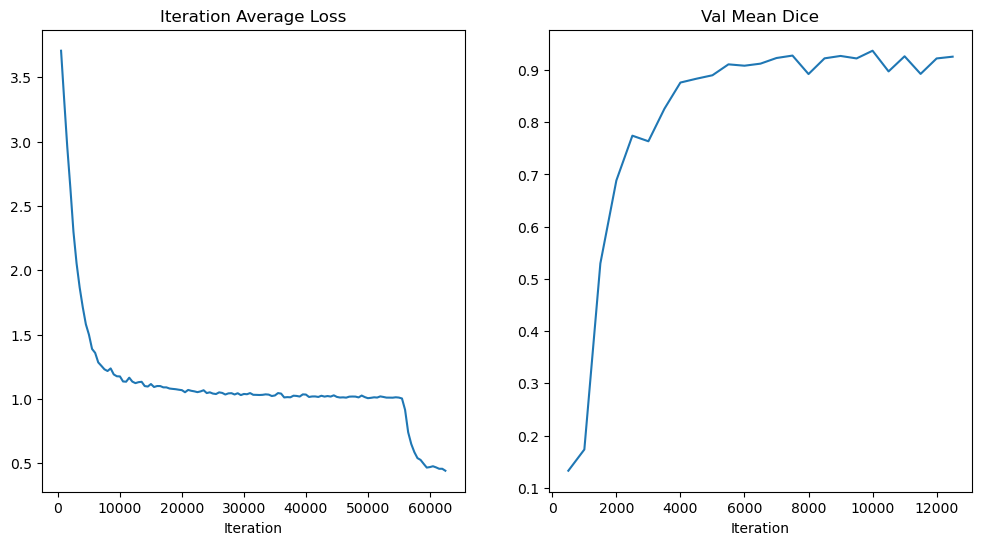

KeyError: '085_0000.nii.gz'

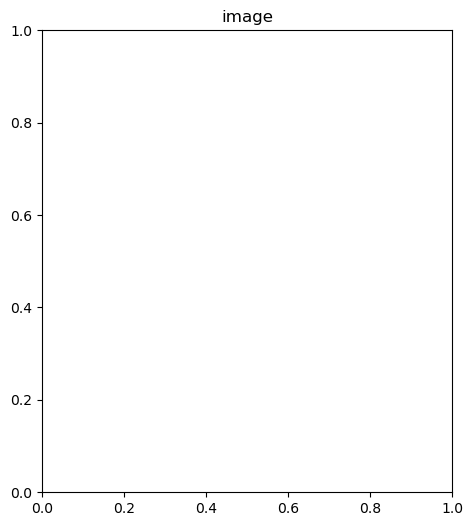

In [2]:
import os
import shutil
import tempfile

import matplotlib.pyplot as plt
from tqdm import tqdm

from monai.losses import DiceCELoss
from monai.inferers import sliding_window_inference
from monai.transforms import (
    AsDiscrete,
    EnsureChannelFirstd,
    Compose,
    CropForegroundd,
    LoadImaged,
    Orientationd,
    RandFlipd,
    RandCropByPosNegLabeld,
    RandShiftIntensityd,
    ScaleIntensityRanged,
    Spacingd,
    RandRotate90d,
    MapTransform,
)

from monai.config import print_config
from monai.metrics import DiceMetric
from monai.networks.nets import UNETR

from monai.data import (
    DataLoader,
    CacheDataset,
    load_decathlon_datalist,
    decollate_batch,
)


import torch
import torch.nn as nn
import numpy as np

print_config()
# 使用指定路径
root_dir = r"D:\pelvis\ct_seg\data\results\U_net"
os.makedirs(root_dir, exist_ok=True)  # 确保目录存在
print(f"模型和结果将保存到: {root_dir}")

# 更新num_classes为31，与实际标签值范围(0-30)匹配
num_classes = 31

# 使用一致的空间尺寸变量
patch_size = (64, 64, 64)  # 改为64³而不是96³

# 修改训练转换以使用正确的裁剪尺寸
train_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        # 保留必要的预处理步骤
        Spacingd(
            keys=["image", "label"],
            pixdim=(1.5, 1.5, 2.0),
            mode=("bilinear", "nearest"),
        ),
        ScaleIntensityRanged(
            keys=["image"],
            a_min=-175,
            a_max=250,
            b_min=0.0,
            b_max=1.0,
            clip=True,
        ),
        # 添加更激进的裁剪以减少内存需求
        CropForegroundd(keys=["image", "label"], source_key="image"),
        # 使用与模型匹配的尺寸
        RandCropByPosNegLabeld(
            keys=["image", "label"],
            label_key="label",
            spatial_size=patch_size,  # 使用一致的尺寸
            pos=1,
            neg=1,
            num_samples=2,
            image_key="image",
            image_threshold=0,
        ),
    ]
)
val_transforms = Compose(
    [
        LoadImaged(keys=["image", "label"]),
        EnsureChannelFirstd(keys=["image", "label"]),
        Orientationd(keys=["image", "label"], axcodes="RAS"),
        Spacingd(
            keys=["image", "label"],
            pixdim=(1.5, 1.5, 2.0),
            mode=("bilinear", "nearest"),
        ),
        ScaleIntensityRanged(keys=["image"], a_min=-175, a_max=250, b_min=0.0, b_max=1.0, clip=True),
        CropForegroundd(keys=["image", "label"], source_key="image"),
    ]
)
data_dir = "D:\\pelvis\\ct_seg\\data"
split_json = os.path.join(data_dir, "dataset.json")

datasets = split_json
datalist = load_decathlon_datalist(datasets, True, "training")
val_files = load_decathlon_datalist(datasets, True, "validation")

# 添加进度显示，监控数据加载过程
print("开始加载训练数据集...")
train_ds = CacheDataset(
    data=datalist,
    transform=train_transforms,
    cache_num=24,
    cache_rate=1.0,
    num_workers=8,
    progress=True,  # 添加进度显示
)
print("训练数据集加载完成!")

print("开始加载验证数据集...")
val_ds = CacheDataset(
    data=val_files, 
    transform=val_transforms, 
    cache_num=6, 
    cache_rate=1.0, 
    num_workers=4,
    progress=True,  # 添加进度显示
)
print("验证数据集加载完成!")

# 创建数据加载器时禁用多进程
print("创建无多进程的训练数据加载器...")
train_loader = DataLoader(
    train_ds, batch_size=1, shuffle=True, 
    num_workers=0,  # 关键修复: 禁用多进程
    pin_memory=True
)

print("创建无多进程的验证数据加载器...")
val_loader = DataLoader(
    val_ds, batch_size=1, 
    num_workers=0,  # 关键修复: 禁用多进程
    pin_memory=True
)

slice_map = {
    "001_0000.nii.gz": 143,
    "002_0000.nii.gz": 178,
    "003_0000.nii.gz": 195,
    "004_0000.nii.gz": 162,
    "005_0000.nii.gz": 186,
    "006_0000.nii.gz": 153,
    "007_0000.nii.gz": 201,
    "008_0000.nii.gz": 172,
    "009_0000.nii.gz": 128,
    "010_0000.nii.gz": 190,
    "011_0000.nii.gz": 165,
    "012_0000.nii.gz": 148,
    "081_0000.nii.gz": 75,
    "082_0000.nii.gz": 156,
    "083_0000.nii.gz": 183,
}
case_num = 0

# 获取图像中间切片作为默认值
def get_middle_slice(img_shape):
    return img_shape[3] // 2  # 获取z轴的中间切片

img_name = os.path.split(val_ds[case_num]["image"].meta["filename_or_obj"])[1]
img = val_ds[case_num]["image"]
label = val_ds[case_num]["label"]
img_shape = img.shape
label_shape = label.shape
print(f"image shape: {img_shape}, label shape: {label_shape}")

# 使用字典的get方法，如果键不存在则使用默认值
slice_index = slice_map.get(img_name, get_middle_slice(img_shape))
print(f"Using slice index: {slice_index} for image: {img_name}")

plt.figure("image", (18, 6))
plt.subplot(1, 2, 1)
plt.title("image")
plt.imshow(img[0, :, :, slice_index].detach().cpu(), cmap="gray")
plt.subplot(1, 2, 2)
plt.title("label")
plt.imshow(label[0, :, :, slice_index].detach().cpu())
plt.show()
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 确保模型定义使用相同的尺寸变量
model = UNETR(
    in_channels=1,
    out_channels=num_classes,  # 修改为31
    img_size=patch_size,
    feature_size=16,
    hidden_size=384,
    mlp_dim=1536,
    num_heads=6,
    proj_type="perceptron",
    norm_name="instance",
    res_block=True,
    dropout_rate=0.0,
).to(device)

# 使用标准损失函数，不进行标签映射
loss_function = DiceCELoss(
    to_onehot_y=True, 
    softmax=True,
    include_background=False  # 不计算背景类的损失
)
torch.backends.cudnn.benchmark = True
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4, weight_decay=1e-5)

# 滑动窗口推理也应该使用相同的尺寸
roi_size = patch_size  # 确保推理窗口尺寸匹配
sw_batch_size = 4

# 确保评估函数定义在训练函数之前
def evaluate_by_region(model, dataloader):
    """根据正确的标签分配评估各解剖区域的分割性能"""
    model.eval()
    
    # 正确的区域定义
    regions = {
        "sacrum": list(range(1, 11)),     # 骶骨区域: 标签1-10
        "left_hip": list(range(11, 21)),  # 左髋骨区域: 标签11-20
        "right_hip": list(range(21, 31))  # 右髋骨区域: 标签21-30
    }
    
    # 存储区域指标
    region_metrics = {region: [] for region in regions}
    total_dice = 0.0
    count = 0
    
    # 添加调试信息
    print("\n======== 评估开始 ========")
    
    with torch.no_grad():
        for val_idx, val_data in enumerate(dataloader):
            val_inputs, val_labels = val_data["image"].to(device), val_data["label"].to(device)
            
            # 打印输入和标签的形状以及值范围
            print(f"样本 {val_idx}:")
            print(f"  图像形状: {val_inputs.shape}, 范围: [{val_inputs.min().item():.2f}, {val_inputs.max().item():.2f}]")
            unique_labels = torch.unique(val_labels).cpu().numpy().tolist()
            print(f"  标签形状: {val_labels.shape}, 包含值: {unique_labels}")
            
            # 滑动窗口推理
            val_outputs = sliding_window_inference(
                val_inputs, roi_size, sw_batch_size, model, overlap=0.7
            )
            
            # 获取预测类别
            val_pred = torch.argmax(val_outputs, dim=1)
            unique_preds = torch.unique(val_pred).cpu().numpy().tolist()
            print(f"  预测形状: {val_pred.shape}, 包含值: {unique_preds}")
            
            # 评估每个解剖区域
            sample_dice = 0.0
            sample_region_count = 0
            
            for region_name, label_range in regions.items():
                # 创建该区域的二值掩码
                region_pred = torch.zeros_like(val_pred, dtype=torch.float32)
                region_true = torch.zeros_like(val_labels, dtype=torch.float32)
                
                # 检查这个区域是否在真实标签中存在
                region_exists = False
                
                # 收集区域内所有标签
                for label in label_range:
                    # 加入预测掩码
                    pred_mask = (val_pred == label)
                    region_pred[pred_mask] = 1
                    
                    # 加入真实标签掩码
                    true_mask = (val_labels == label)
                    region_true[true_mask] = 1
                    
                    # 检查该标签是否存在
                    if true_mask.sum() > 0:
                        region_exists = True
                
                # 仅当区域在真实标签中存在时计算Dice
                if region_exists:
                    # 计算此区域的Dice分数
                    intersection = torch.sum(region_pred * region_true).item()
                    pred_sum = torch.sum(region_pred).item()
                    true_sum = torch.sum(region_true).item()
                    
                    # 调试输出区域统计
                    print(f"  {region_name}: 交集={intersection}, 预测总和={pred_sum}, 真实总和={true_sum}")
                    
                    if pred_sum + true_sum > 0:
                        dice = 2.0 * intersection / (pred_sum + true_sum)
                        region_metrics[region_name].append(dice)
                        sample_dice += dice
                        sample_region_count += 1
                        print(f"    Dice = {dice:.4f}")
                    else:
                        print(f"    跳过 (预测和真实总和为0)")
                else:
                    print(f"  {region_name}: 在此样本中不存在")
            
            # 计算此样本的平均Dice
            if sample_region_count > 0:
                sample_avg_dice = sample_dice / sample_region_count
                total_dice += sample_avg_dice
                count += 1
                print(f"  样本平均Dice: {sample_avg_dice:.4f}")
            else:
                print(f"  样本中没有可评估的区域")
    
    # 计算并显示每个区域的平均分数
    print("\n======== 区域评估结果 ========")
    
    region_avgs = {}
    for region, scores in region_metrics.items():
        if scores:
            avg_score = sum(scores) / len(scores)
            region_avgs[region] = avg_score
            print(f"{region}区域Dice: {avg_score:.4f} (基于{len(scores)}个样本)")
        else:
            region_avgs[region] = 0.0
            print(f"{region}区域: 无评估数据")
    
    # 计算总体平均
    overall_avg = total_dice / count if count > 0 else 0.0
    print(f"所有样本平均Dice: {overall_avg:.4f}")
    print("======== 评估结束 ========\n")
    
    return overall_avg, region_avgs

# 训练函数，确保不进行标签映射
def train(global_step, train_loader, dice_val_best, global_step_best, max_iter=25000):
    """执行完整训练循环，不做标签映射"""
    model.train()
    epoch_loss = 0
    step = 0
    epoch = 0
    
    # 显示目标训练信息
    print(f"\n开始训练 - 目标迭代次数: {max_iter}")
    print(f"当前最佳Dice: {dice_val_best:.4f}, 在步骤: {global_step_best}")
    
    # 继续训练直到达到最大迭代次数
    while global_step < max_iter:
        epoch += 1
        epoch_loss = 0
        step = 0
        
        # 添加进度条显示
        progress_bar = tqdm(train_loader, desc=f"Epoch {epoch}", unit="批次", 
                           mininterval=10.0)  # 增加最小更新间隔为10秒
        
        for batch_data in progress_bar:
            step += 1
            # 直接使用原始图像和标签，不进行映射
            x, y = (
                batch_data["image"].to(device),
                batch_data["label"].to(device),
            )
            
            # 前向传播
            outputs = model(x)
            
            # 使用原始标签计算损失，不需要映射
            loss = loss_function(outputs, y)
            
            # 反向传播
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            epoch_loss += loss.item()
            global_step += 1
            
            # 仅在步数为100的倍数时更新进度条显示详情
            if global_step % 100 == 0:
                progress_bar.set_postfix({
                    '迭代': f"{global_step}/{max_iter}",
                    'loss': f"{loss.item():.4f}",
                    'avg_loss': f"{epoch_loss / step:.4f}"
                })
            
            # 保存损失记录
            if global_step % 200 == 0:  # 增加到每200步记录一次
                epoch_loss_values.append(epoch_loss / step)
                
            # 每1000步评估一次
            if global_step % 1000 == 0:
                # 清理GPU缓存
                torch.cuda.empty_cache()
                
                # 使用正确的评估函数，不进行标签映射
                dice_val, region_metrics = evaluate_by_region(model, val_loader)
                metric_values.append(dice_val)
                
                # 简化输出，只记录改进
                if dice_val > dice_val_best:
                    dice_val_best = dice_val
                    global_step_best = global_step
                    torch.save(model.state_dict(), os.path.join(root_dir, "best_metric_model.pth"))
                    print(f"\n新最佳模型! 步骤: {global_step}, Dice: {dice_val:.4f}")
                
                # 打印评估信息（显示区域指标）
                print(f"\n评估 @ 步骤 {global_step}")
                print(f"总体Dice: {dice_val:.4f}, 最佳: {dice_val_best:.4f}")
                print("区域指标:")
                for region, score in region_metrics.items():
                    print(f"- {region}: {score:.4f}")
                
                # 每5000步打印一次当前的学习曲线
                if global_step % 5000 == 0:
                    plt.figure("train", (12, 6))
                    plt.subplot(1, 2, 1)
                    plt.title("训练平均损失")
                    x = [(i + 1) * 200 for i in range(len(epoch_loss_values))]
                    y = epoch_loss_values
                    plt.xlabel("迭代次数")
                    plt.plot(x, y)
                    plt.subplot(1, 2, 2)
                    plt.title("验证平均Dice")
                    x = [(i + 1) * 1000 for i in range(len(metric_values))]
                    y = metric_values
                    plt.xlabel("迭代次数")
                    plt.plot(x, y)
                    plt.savefig(os.path.join(root_dir, f"learning_curve_{global_step}.png"))
                    plt.close()
                
                # 恢复训练模式
                model.train()
                
                # 定期保存检查点，以防训练中断
                torch.save(
                    {
                        "global_step": global_step,
                        "model_state_dict": model.state_dict(),
                        "optimizer_state_dict": optimizer.state_dict(),
                        "dice_val_best": dice_val_best,
                        "global_step_best": global_step_best,
                    },
                    os.path.join(root_dir, f"checkpoint_{global_step}.pth"),
                )
            
            # 每10个epoch显示一次平均损失
            if global_step % (10 * len(train_loader)) == 0:
                print(f"Epoch {epoch} - 平均损失: {epoch_loss / step:.4f}")
            
            # 达到最大迭代次数则提前结束
            if global_step >= max_iter:
                break
                
        # 每个epoch结束时清理GPU缓存
        torch.cuda.empty_cache()
    
    print(f"训练完成! 共执行{global_step}步，最佳Dice: {dice_val_best:.4f} @ 步骤 {global_step_best}")
    return global_step, dice_val_best, global_step_best

# 显示训练设备信息，保留这部分有用信息
print("\n\n==================================================")
print(f"训练设备: {device}")
if torch.cuda.is_available():
    print(f"GPU数量: {torch.cuda.device_count()}")
    for i in range(torch.cuda.device_count()):
        print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
    print(f"当前GPU: {torch.cuda.current_device()}")
    print(f"CUDA版本: {torch.version.cuda}")
print("==================================================\n")

# 原来监视器代码之后的测试函数
def minimal_train_test():
    """最小化训练循环，只测试第一个批次"""
    print("开始最小化训练测试...")
    model.train()
    
    try:
        # 获取一个批次进行测试
        for batch_data in train_loader:
            x, y = (
                batch_data["image"].to(device),
                batch_data["label"].to(device),
            )
            
            # 简化输出，只显示关键信息
            print("执行测试批次前向传播...")
            outputs = model(x)
            
            print("计算损失...")
            loss = loss_function(outputs, y)
            print(f"损失值: {loss.item():.4f}")
            
            print("执行反向传播和优化器步骤...")
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
            print("最小化训练测试成功完成!")
            return True
        
        print("警告: 没有找到训练数据!")
        return False
            
    except Exception as e:
        print(f"最小化训练测试失败: {str(e)}")
        import traceback
        traceback.print_exc()
        return False

if __name__ == '__main__':
    # 添加这行代码以支持Windows多进程
    import multiprocessing
    multiprocessing.freeze_support()
    
    # 显示训练设备信息
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    print(f"\n{'='*50}")
    print(f"训练设备: {device}")
    
    if torch.cuda.is_available():
        print(f"GPU数量: {torch.cuda.device_count()}")
        for i in range(torch.cuda.device_count()):
            print(f"GPU {i}: {torch.cuda.get_device_name(i)}")
        print(f"当前GPU: {torch.cuda.current_device()}")
        print(f"CUDA版本: {torch.version.cuda}")
    else:
        print("警告: 没有可用的GPU，训练将在CPU上进行(速度会很慢!)")
    print(f"{'='*50}\n")
    
    # 将主要执行代码移到这里
    max_iterations = 25000  # 减少迭代次数以便更快完成训练测试
    eval_num = 500
    post_label = AsDiscrete(to_onehot=14)
    post_pred = AsDiscrete(argmax=True, to_onehot=14)
    dice_metric = DiceMetric(include_background=True, reduction="mean", get_not_nans=False)
    global_step = 0
    dice_val_best = 0.0
    global_step_best = 0
    epoch_loss_values = []
    metric_values = []

    # 注释掉所有监视器相关代码
    """
    import threading
    import time

    # 添加监视器线程检测死锁
    def monitor_thread():
        #监视主线程，如果长时间无进展则打印堆栈信息
        import sys
        import traceback
        
        start_time = time.time()
        while True:
            time.sleep(30)  # 每30秒检查一次
            elapsed = time.time() - start_time
            print(f"\n[监视器] 已等待 {elapsed:.1f} 秒无明显进展")
            
            # 打印所有线程的堆栈信息
            print("\n[监视器] 当前所有线程堆栈信息:")
            for th in threading.enumerate():
                print(f"\n线程 {th.name}:")
                traceback.print_stack(sys._current_frames()[th.ident])
            
            if elapsed > 300:  # 5分钟后提供建议
                print("\n[监视器] 程序可能已死锁。建议:")
                print("1. 按Ctrl+C中断程序")
                print("2. 尝试以下修复方案:")
                print("   - 设置num_workers=0")
                print("   - 移除CacheDataset")
                print("   - 创建更简单的训练循环")

    # 启动监视器线程
    monitor = threading.Thread(target=monitor_thread, daemon=True)
    monitor.start()
    print("监视器线程已启动，将监控程序进展...")
    """
    
    print("\n===== 尝试最小化训练测试 =====")
    if minimal_train_test():
        print("基础功能测试成功，继续完整训练...")
        # 修复: 传入最大迭代次数参数
        train_results = train(0, train_loader, 0, 0, max_iterations)
        
        print(f"训练返回结果: {train_results}")
        
        # 正确解析三个返回值
        iterations, dice_val_best, global_step_best = train_results
        
        print(f"训练完成，总迭代次数: {iterations}")
        print(f"最佳指标: {dice_val_best:.4f}，在迭代步骤: {global_step_best}")
        
        # 强制保存最终模型，无论性能如何
        print("强制保存最终模型...")
        model_file = os.path.join(root_dir, "final_model.pth")
        torch.save(model.state_dict(), model_file)
        print(f"已保存最终模型至: {model_file}")
        
        # 检查最终模型文件
        if os.path.exists(model_file):
            print(f"确认: 最终模型文件已成功保存")
            
            # 加载最终模型用于评估
            model.load_state_dict(torch.load(model_file))
            print(f"已加载最终模型进行评估")
            
            # 确保使用正确的滑动窗口大小
            val_inputs = torch.unsqueeze(img, 1).cuda()
            val_labels = torch.unsqueeze(label, 1).cuda()
            
            # 使用与模型定义一致的patch_size
            val_outputs = sliding_window_inference(
                val_inputs, 
                roi_size=patch_size,  # 使用与模型定义相同的尺寸
                sw_batch_size=1,      # 减小批次大小从4到1
                predictor=model, 
                overlap=0.5           # 减小重叠度从0.8到0.5
            )
            
            # 模型评估和可视化
            plt.figure("train", (12, 6))
            plt.subplot(1, 2, 1)
            plt.title("Iteration Average Loss")
            x = [eval_num * (i + 1) for i in range(len(epoch_loss_values))]
            y = epoch_loss_values
            plt.xlabel("Iteration")
            plt.plot(x, y)
            plt.subplot(1, 2, 2)
            plt.title("Val Mean Dice")
            x = [eval_num * (i + 1) for i in range(len(metric_values))]
            y = metric_values
            plt.xlabel("Iteration")
            plt.plot(x, y)
            plt.show()

            case_num = 4
            model.eval()
            with torch.no_grad():
                img_name = os.path.split(val_ds[case_num]["image"].meta["filename_or_obj"])[1]
                img = val_ds[case_num]["image"]
                label = val_ds[case_num]["label"]
                val_inputs = torch.unsqueeze(img, 1).cuda()
                val_labels = torch.unsqueeze(label, 1).cuda()
                val_outputs = sliding_window_inference(val_inputs, patch_size, 1, model, overlap=0.5)
                plt.figure("check", (18, 6))
                plt.subplot(1, 3, 1)
                plt.title("image")
                plt.imshow(val_inputs.cpu().numpy()[0, 0, :, :, slice_map[img_name]], cmap="gray")
                plt.subplot(1, 3, 2)
                plt.title("label")
                plt.imshow(val_labels.cpu().numpy()[0, 0, :, :, slice_map[img_name]])
                plt.subplot(1, 3, 3)
                plt.title("output")
                plt.imshow(torch.argmax(val_outputs, dim=1).detach().cpu()[0, :, :, slice_map[img_name]])
                plt.show()
        else:
            print(f"错误: 最终模型文件未能保存: {model_file}")
            print("请检查磁盘空间和写入权限")
        
        # 单独检查是否有最佳模型(如果Dice分数大于0)
        if dice_val_best > 0:
            best_model_file = os.path.join(root_dir, "best_metric_model.pth")
            if os.path.exists(best_model_file):
                print(f"最佳模型也已保存: {best_model_file}")
    else:
        print("基础功能测试失败，跳过完整训练...")
        print("建议检查数据和模型兼容性问题")

def visualize_prediction(model, val_data, index=0):
    """可视化模型预测结果，使用原始标签值（0-30）"""
    model.eval()
    
    # 生成颜色映射, 0为背景(黑色), 其他按区域分组
    colors = plt.cm.get_cmap('tab20', 30)  # 使用tab20色图获取20种颜色
    
    with torch.no_grad():
        # 获取单个样本
        val_inputs = val_data["image"].to(device)
        val_labels = val_data["label"].to(device)
        
        # 滑动窗口推理
        val_outputs = sliding_window_inference(
            val_inputs, roi_size, sw_batch_size, model, overlap=0.7
        )
        
        # 获取预测类别
        val_pred = torch.argmax(val_outputs, dim=1).cpu().numpy()
        
        # 准备显示数据
        image = val_inputs[0, 0].cpu().numpy()
        label = val_labels[0, 0].cpu().numpy()
        pred = val_pred[0]
        
        # 获取中心切片
        z_idx = image.shape[2] // 2
        
        # 显示结果
        plt.figure("预测结果", (18, 6))
        
        # 显示原始图像
        plt.subplot(1, 3, 1)
        plt.title("原始图像")
        plt.imshow(image[:, :, z_idx], cmap="gray")
        plt.colorbar(shrink=0.8)
        
        # 显示真实标签，使用自定义颜色映射
        plt.subplot(1, 3, 2)
        plt.title("真实标签")
        masked_label = np.ma.masked_where(label[:, :, z_idx] == 0, label[:, :, z_idx])
        plt.imshow(image[:, :, z_idx], cmap="gray")
        # 使用不同颜色显示不同区域
        sacrum_mask = np.ma.masked_where((label[:, :, z_idx] < 1) | (label[:, :, z_idx] > 10), label[:, :, z_idx])
        left_hip_mask = np.ma.masked_where((label[:, :, z_idx] < 11) | (label[:, :, z_idx] > 20), label[:, :, z_idx])
        right_hip_mask = np.ma.masked_where((label[:, :, z_idx] < 21) | (label[:, :, z_idx] > 30), label[:, :, z_idx])
        
        plt.imshow(sacrum_mask, cmap='Reds', alpha=0.7)
        plt.imshow(left_hip_mask, cmap='Greens', alpha=0.7)
        plt.imshow(right_hip_mask, cmap='Blues', alpha=0.7)
        plt.colorbar(shrink=0.8)
        
        # 显示预测结果
        plt.subplot(1, 3, 3)
        plt.title("模型预测")
        masked_pred = np.ma.masked_where(pred[:, :, z_idx] == 0, pred[:, :, z_idx])
        plt.imshow(image[:, :, z_idx], cmap="gray")
        
        # 使用不同颜色显示不同预测区域
        sacrum_pred = np.ma.masked_where((pred[:, :, z_idx] < 1) | (pred[:, :, z_idx] > 10), pred[:, :, z_idx])
        left_hip_pred = np.ma.masked_where((pred[:, :, z_idx] < 11) | (pred[:, :, z_idx] > 20), pred[:, :, z_idx])
        right_hip_pred = np.ma.masked_where((pred[:, :, z_idx] < 21) | (pred[:, :, z_idx] > 30), pred[:, :, z_idx])
        
        plt.imshow(sacrum_pred, cmap='Reds', alpha=0.7)
        plt.imshow(left_hip_pred, cmap='Greens', alpha=0.7)
        plt.imshow(right_hip_pred, cmap='Blues', alpha=0.7)
        plt.colorbar(shrink=0.8)
        
        plt.tight_layout()
        plt.savefig(os.path.join(root_dir, f"prediction_vis_{index}.png"), dpi=300)
        plt.show()